# Model Deployment and Solar Panel Location Mapping

In [ ]:
cd /content/yolov5

In [ ]:
!rm -r
!rm -r /content/yolov5/runs/detect

In [ ]:
import pandas as pd
import numpy as np
import os
import urllib.request
import math
import subprocess
from pathlib import Path


def get_tile_coordinates(lat1, lng1, lat2, lng2, zoom):
    tile_size = 256
    num_tiles_x = 1 << zoom
    num_tiles_y = 1 << zoom

    x1, y1 = get_tile(lat1, lng1, zoom)
    x2, y2 = get_tile(lat2, lng2, zoom)

    min_x, max_x = min(x1, x2), max(x1, x2)
    min_y, max_y = min(y1, y2), max(y1, y2)

    return [(x, y) for x in range(min_x, max_x + 1) for y in range(min_y, max_y + 1)]
def get_tile(lat, lng, zoom):
    tile_size = 256
    num_tiles = 1 << zoom

    point_x = (tile_size / 2 + lng * tile_size / 360.0) * num_tiles // tile_size
    sin_y = math.sin(lat * (math.pi / 180.0))
    point_y = ((tile_size / 2) + 0.5 * math.log((1 + sin_y) / (1 - sin_y)) * -(tile_size / (2 * math.pi))) * num_tiles // tile_size

    return int(point_x), int(point_y)

def download_tiles(coordinates, zoom, directory):
    os.makedirs(directory, exist_ok=True)

    for x, y in coordinates:
        lat, lng = get_lat_lng_for_tile(x, y, zoom)
        url = f'https://mt0.google.com/vt?lyrs=s&x={x}&y={y}&z={zoom}'
        filename = os.path.join(directory, f'tile_{lat}_{lng}_{zoom}.png')

        # Download the tile
        urllib.request.urlretrieve(url, filename)

def get_lat_lng_for_tile(x, y, zoom):
    tile_size = 256
    num_tiles = 1 << zoom

    lng = x / num_tiles * 360.0 - 180
    n = math.pi - 2 * math.pi * y / num_tiles
    lat = 180.0 / math.pi * math.atan(0.5 * (math.exp(n) - math.exp(-n)))

    return lat, lng

def get_dataframe(tile_coordinates, zoom):
    # Create a dataframe to hold the coordinates
    df = pd.DataFrame(columns=['lat', 'lng', 'filename'])

    # Iterate over the tile coordinates
    for x, y in tile_coordinates:
        # Calculate the latitudes and longitudes of the tile
        lat, lng = get_lat_lng_for_tile(x, y, zoom)
        filename = f'tile_{lat}_{lng}_{zoom}.png'

        # Add the coordinates and filename to the dataframe
        df = df.append({'lat': lat, 'lng': lng, 'filename': filename}, ignore_index=True)

    return df

def main():
    # Coordinates for the opposite corners of the rectangular area
    lat1, lng1 = 32.03300020629299, 35.81112796227202
    lat2, lng2 = 31.875135777906017, 36.04422455964176
    zoom_level = 19  # Adjust the zoom level as needed
    output_directory = "Amman"  # Specify the directory name

    # Calculate tile coordinates
    tile_coordinates = get_tile_coordinates(lat1, lng1, lat2, lng2, zoom_level)

    # Get dataframe
    df = get_dataframe(tile_coordinates, zoom_level)
    df.to_csv('Amman.csv')
    # Download tiles
    download_tiles(tile_coordinates, zoom_level, output_directory)

    # Run the YOLOv5 model on the downloaded tiles
    weights_path = Path("/content/yolov5/runs/train/exp10/weights/best.pt").resolve()
    image_dir = Path(output_directory).resolve()
    subprocess.run(f"python detect.py --weights {weights_path} --source {image_dir} --save-txt --conf 0.594", shell=True, check=True)
if __name__ == "__main__":
    main()

In [ ]:
#Test2 separtor
def get_tile_coordinates(lat1, lng1, lat2, lng2, zoom):
    tile_size = 256
    num_tiles_x = 1 << zoom
    num_tiles_y = 1 << zoom

    x1, y1 = get_tile(lat1, lng1, zoom)
    x2, y2 = get_tile(lat2, lng2, zoom)

    min_x, max_x = min(x1, x2), max(x1, x2)
    min_y, max_y = min(y1, y2), max(y1, y2)

    return [(x, y) for x in range(min_x, max_x + 1) for y in range(min_y, max_y + 1)]

def get_dataframe(tile_coordinates, zoom):
    # Create a dataframe to hold the coordinates
    df = pd.DataFrame(columns=['lat', 'lng', 'filename'])

    # Iterate over the tile coordinates
    for x, y in tile_coordinates:
        # Calculate the latitudes and longitudes of the tile
        lat, lng = get_lat_lng_for_tile(x, y, zoom)
        filename = f'tile_{lat}_{lng}_{zoom}.png'

        # Add the coordinates and filename to the dataframe
        df = df.append({'lat': lat, 'lng': lng, 'filename': filename}, ignore_index=True)

    return df

# Coordinates for the opposite corners of the rectangular area
lat1, lng1 = 32.03300020629299, 35.81112796227202
lat2, lng2 = 31.875135777906017, 36.04422455964176
zoom_level = 19  # Adjust the zoom level as needed
output_directory = "Amman"  # Specify the directory name

# Calculate tile coordinates
tile_coordinates = get_tile_coordinates(lat1, lng1, lat2, lng2, zoom_level)

# Get dataframe
df = get_dataframe(tile_coordinates, zoom_level)
df.to_csv('Amman.csv')



Streaming output truncated to the last 5000 lines.
<ipython-input-10-bbb3858c586e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lat': lat, 'lng': lng, 'filename': filename}, ignore_index=True)
<ipython-input-10-bbb3858c586e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lat': lat, 'lng': lng, 'filename': filename}, ignore_index=True)
<ipython-input-10-bbb3858c586e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lat': lat, 'lng': lng, 'filename': filename}, ignore_index=True)
<ipython-input-10-bbb3858c586e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'la

In [ ]:
#test 2 user agebt
import pandas as pd
import numpy as np
import os
import urllib.request
import math
import subprocess
from pathlib import Path
import time


def get_tile(lat, lng, zoom):
    tile_size = 256
    num_tiles = 1 << zoom

    point_x = (tile_size / 2 + lng * tile_size / 360.0) * num_tiles // tile_size
    sin_y = math.sin(lat * (math.pi / 180.0))
    point_y = ((tile_size / 2) + 0.5 * math.log((1 + sin_y) / (1 - sin_y)) * -(tile_size / (2 * math.pi))) * num_tiles // tile_size

    return int(point_x), int(point_y)



def download_tiles(coordinates, zoom, directory):
    os.makedirs(directory, exist_ok=True)

    # Create a custom opener
    opener = urllib.request.build_opener()
    opener.addheaders = [('User-agent', 'Mozilla/5.0')]
    urllib.request.install_opener(opener)

    # Split coordinates into chunks of 1000
    chunks = [coordinates[i:i + 1000] for i in range(0, len(coordinates), 1000)]

    for chunk in chunks:
        for x, y in chunk:
            lat, lng = get_lat_lng_for_tile(x, y, zoom)
            url = f'https://mt0.google.com/vt?lyrs=s&x={x}&y={y}&z={zoom}'
            filename = os.path.join(directory, f'tile_{lat}_{lng}_{zoom}.png')

            # Download the tile with retry
            for _ in range(5):  # Retry 5 times
                try:
                    urllib.request.urlretrieve(url, filename)
                    break  # If successful, break the loop
                except urllib.error.HTTPError as e:
                    print(f"HTTP Error {e.code} encountered. Retrying...")
                    time.sleep(5)  # Wait for 5 seconds before retrying

        # Wait for 10 seconds before downloading the next batch
        time.sleep(10)

def get_lat_lng_for_tile(x, y, zoom):
    tile_size = 256
    num_tiles = 1 << zoom

    lng = x / num_tiles * 360.0 - 180
    n = math.pi - 2 * math.pi * y / num_tiles
    lat = 180.0 / math.pi * math.atan(0.5 * (math.exp(n) - math.exp(-n)))

    return lat, lng


# Download tiles
download_tiles(tile_coordinates, zoom_level, output_directory)



In [ ]:
# Run the YOLOv5 model on the downloaded tiles
weights_path = Path("/content/yolov5/runs/train/exp10/weights/best.pt").resolve()
image_dir = Path(output_directory).resolve()
subprocess.run(f"python detect.py --weights {weights_path} --source {image_dir} --save-txt --conf 0.594", shell=True, check=True)


CompletedProcess(args='python detect.py --weights /content/yolov5/runs/train/exp10/weights/best.pt --source /content/yolov5/Amman --save-txt --conf 0.594', returncode=0)

In [ ]:
#test count
import glob

# After calling the detect.py script
df = pd.read_csv('Amman.csv')

# Get a list of all label files
label_files = glob.glob('/content/yolov5/runs/detect/exp/labels/*.txt')

# Create a dictionary to store the filename and count of objects
counts_dict = {}

# Iterate over the label files
for file in label_files:
    # Get the filename without the extension
    filename = os.path.basename(file).replace('.txt', '.png')

    # Count the number of lines in the file
    with open(file, 'r') as f:
        count = sum(1 for _ in f)

    # Add the count to the dictionary
    counts_dict[filename] = count

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame(list(counts_dict.items()), columns=['filename', 'count'])

# Merge the two DataFrames on the filename column
df = pd.merge(df, counts_df, on='filename')

# Save the updated DataFrame
df.to_csv('Amman.csv', index=False)

In [ ]:
#
import folium
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('UNi.csv')

# Create a map centered at the mean of latitude and longitude values
m = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=13)

# Add the Esri Satellite tile layer to the map
tile = folium.TileLayer(
    tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr = 'Esri',
    name = 'Esri Satellite',
    overlay = False,
    control = True
).add_to(m)

# Add a pin to the map for each row in the DataFrame
for idx, row in df.iterrows():]
    folium.Marker([row['lat'], row['lng']]).add_to(m)

# Display the map in the notebook
m

### Running this notebook should give you an interactive Folium map that displays the same map as below (level of detail depends on different zoom levels):

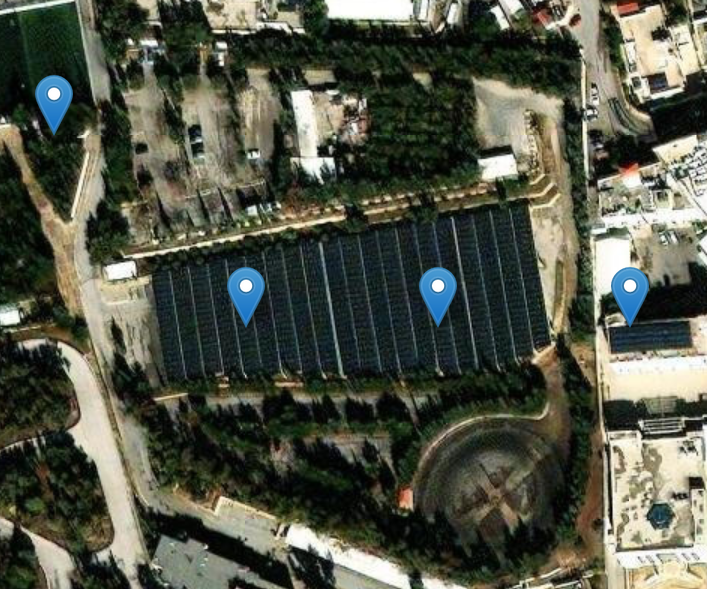

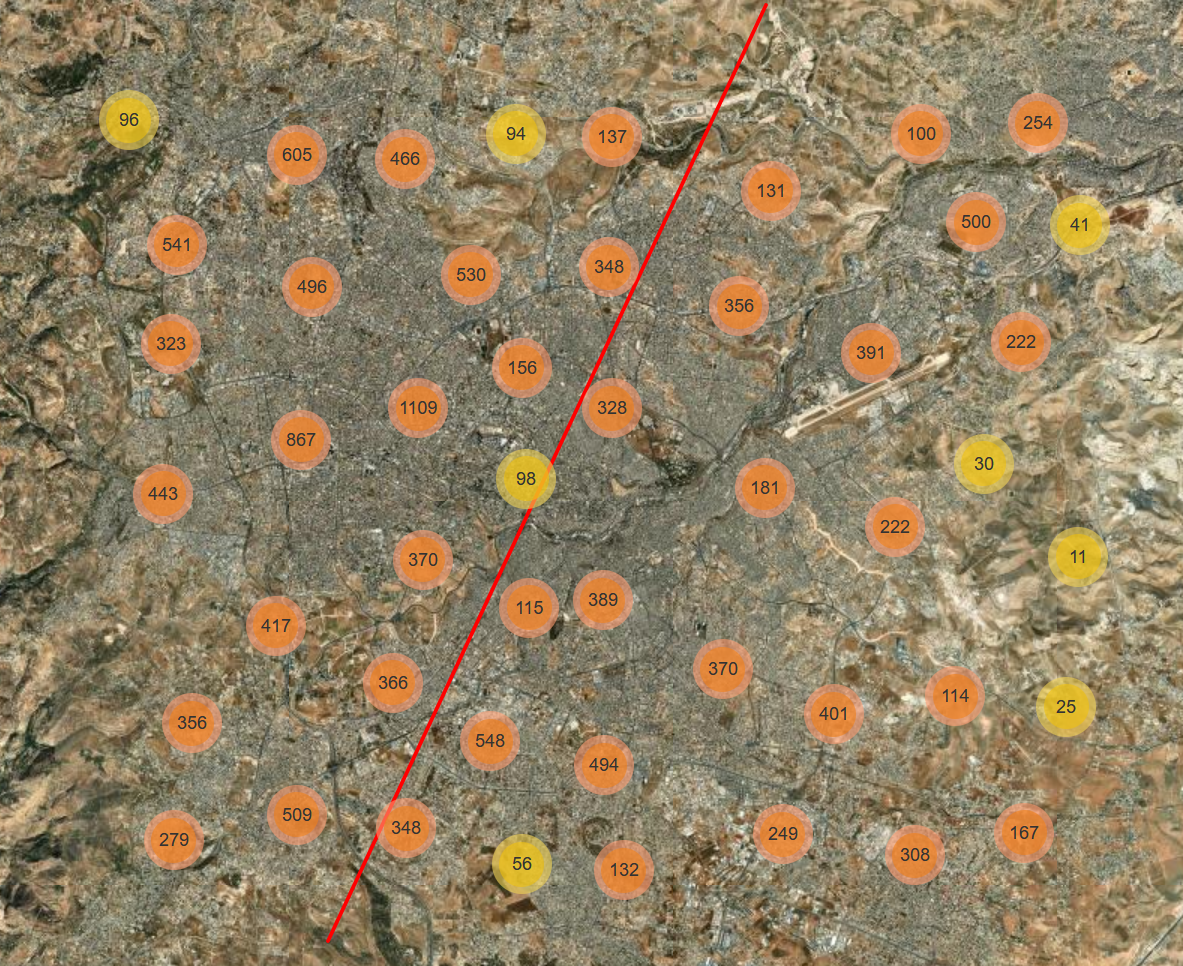

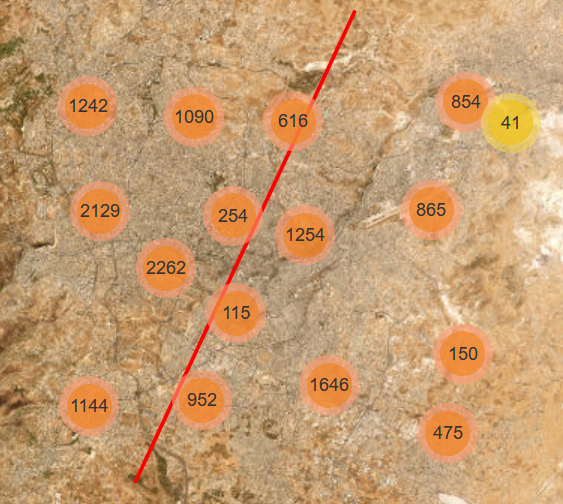

In [ ]:
cp -r /content/yolov5 /content/drive/MyDrive/AI\ Project/Amman/mapping